数据文件格式json分析  
{"c":"1415.59,13369599,1,25,57b8cce4,1381770056","m":"最后的福利~"}  
对应内容  
{"c": "播放时间,颜色,模式,字号,uid,发送时间", "m": "弹幕内容"}  
C:  
dtTime = 播放时间:按秒计  
rgb = 颜色:十进制颜色  
danmu_model = 模式:1-3:滚动弹幕4:底端弹幕5:顶端弹幕7:高级弹幕  
font = 字号:十进制整数 1-99  
userid = uid:  
stamp = 发送时间:时间戳  
m:  
message = 弹幕内容  

In [618]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

导入弹幕数据文件,并按照json内容 划分为列

In [619]:
list_episode = []
for i in range(3,142):
    df = pd.read_json('../data/hxh/%s.json'%(i),encoding='utf-8')
    df = df.rename(columns=lambda x:x.replace('m','message'))
    df['dtTime'],df['rgb'],df['danmu_model'],df['font'],df['userid'],df['stamp'] = df['c'].str.split(',',6).str
    df['episode'] = i
    df = df.drop(['c'],axis = 1)
    list_episode.append(df)
data = pd.concat(list_episode,ignore_index=True)
data

,message,dtTime,rgb,danmu_model,font,userid,stamp,episode
0,剧透：奇犽出现，少女化,0,16776960,1,36,3859422e,1329040272,3
1,另一个补番的乃在吗。。。,0,16777215,1,25,5e733973,1364217939,3
2,不想看吵架的请屏蔽 难听、烂、剧透、垃圾、优越,0,16711680,5,25,366cf67f,1380892361,3
3,h,0,16777215,1,25,94d849aa,1386144291,3
4,我是3001,0,16777215,1,25,235a82a0,1393138554,3
5,在哦,1.307,16777215,1,25,3de79f22,1375087145,3
6,药师兜！,2.304,16777215,1,25,a8c0e321,1346656369,3
7,啊啊啊啊啊！把我家西索的声音毁完了啊！大叔你是谁啊？,3.248,16777215,1,25,8cc88fe1,1375191621,3
8,這豪放的唱腔= =,3.748,16777215,1,25,2427a8b1,1361178051,3
9,开就,3.986,16777215,1,25,08d9a558,1363294622,3


查看是否有空值

In [620]:
data.isnull().sum().any()

False

查看数据概况

In [668]:
data.shape

(368283, 12)

In [621]:
data.head()

,message,dtTime,rgb,danmu_model,font,userid,stamp,episode
0,剧透：奇犽出现，少女化,0,16776960,1,36,3859422e,1329040272,3
1,另一个补番的乃在吗。。。,0,16777215,1,25,5e733973,1364217939,3
2,不想看吵架的请屏蔽 难听、烂、剧透、垃圾、优越,0,16711680,5,25,366cf67f,1380892361,3
3,h,0,16777215,1,25,94d849aa,1386144291,3
4,我是3001,0,16777215,1,25,235a82a0,1393138554,3


提取时间戳里的 小时 年 月 生成新的列合并

In [622]:
def timechange(times):
    time_local = time.localtime(int(times))
    return time_local.tm_hour

In [623]:
data['hour']= data['stamp'].map(timechange)

In [624]:
def timechangeyear(times):
    time_local = time.localtime(int(times))
    return time_local.tm_year

In [625]:
data['year']= data['stamp'].map(timechangeyear)

In [626]:
def timechangemon(times):
    time_local = time.localtime(int(times))
    return time_local.tm_mon

In [627]:
data['mon']= data['stamp'].map(timechangemon)

In [628]:
data

,message,dtTime,rgb,danmu_model,font,userid,stamp,episode,hour,year,mon
0,剧透：奇犽出现，少女化,0,16776960,1,36,3859422e,1329040272,3,17,2012,2
1,另一个补番的乃在吗。。。,0,16777215,1,25,5e733973,1364217939,3,21,2013,3
2,不想看吵架的请屏蔽 难听、烂、剧透、垃圾、优越,0,16711680,5,25,366cf67f,1380892361,3,21,2013,10
3,h,0,16777215,1,25,94d849aa,1386144291,3,16,2013,12
4,我是3001,0,16777215,1,25,235a82a0,1393138554,3,14,2014,2
5,在哦,1.307,16777215,1,25,3de79f22,1375087145,3,16,2013,7
6,药师兜！,2.304,16777215,1,25,a8c0e321,1346656369,3,15,2012,9
7,啊啊啊啊啊！把我家西索的声音毁完了啊！大叔你是谁啊？,3.248,16777215,1,25,8cc88fe1,1375191621,3,21,2013,7
8,這豪放的唱腔= =,3.748,16777215,1,25,2427a8b1,1361178051,3,17,2013,2
9,开就,3.986,16777215,1,25,08d9a558,1363294622,3,4,2013,3


查看弹幕总数

In [629]:
#弹幕总数
data.shape[0]

403996

解决plt绘图中文问题

In [630]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False    

绘图 查看弹幕密度情况 用户发送弹幕数量情况

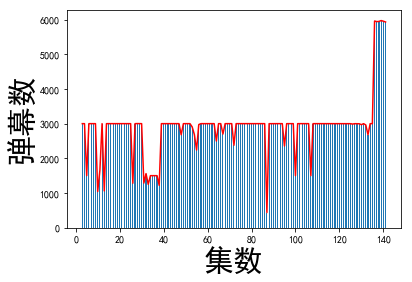

In [631]:
#x集 y弹幕量    bar+线
data1 = data['episode'].value_counts()
data1 = data1.sort_index()
data1_index = np.array(data1.index)
data1_index
data1_value = np.array(data1.values)
data1_value
plt.bar(data1_index,data1_value,0.5)
plt.xlabel('集数',size=30)
plt.ylabel('弹幕数',size=30)
plt.plot(data1_index,data1_value,c='red')

<Container object of 10 artists>

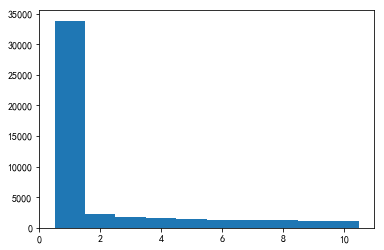

In [632]:
#用户弹幕量排名  
data_damperuser = data['userid'].value_counts()
data_damperuser_hbar = data_damperuser.values
plt.bar(top10_index,data_damperuser_hbar[:10],1)

发现第一名的用户发了30000多发弹幕,远超其他人,考虑为异常,进行检查

In [633]:
#看看第一名
data['userid'].value_counts()

0bc076ae    33835
54ce91d1     2174
Da219f1c     1743
84cccadc     1584
0b7f9ddc     1377
8018acec     1253
7ca1450b     1203
2c2e8652     1196
7d969751     1126
1f5ff351     1118
ebada4bc     1101
65117090     1047
117305b8      984
c0566b9b      940
8475edd6      929
70cb3c99      909
e286d68e      882
0a633c2e      872
964e5187      851
7459f9cd      811
081c870f      741
7aab9a54      719
a32c2517      648
976aa215      585
05c719d0      568
57b8cce4      568
b9c2b371      567
6fc2e67e      542
6f9019fa      537
4a0c4ba4      529
            ...  
9461a5c6        1
45cdf2bb        1
D3b7d056        1
bd3228ca        1
6f3c2b0f        1
63770f9d        1
4fa2f6bd        1
9ee49cd8        1
e6f57320        1
4b01d94d        1
9028253f        1
D79da5fd        1
c377a8b4        1
D1de02e8        1
8b382946        1
8318ae75        1
Da7c5c32        1
f6864f5f        1
5201b71f        1
6c006aef        1
b5342688        1
482c3a76        1
ba77a757        1
D296c3e2        1
eb062007  

确定问题任务id,及信息,发现大量弹幕是同一个时间点发送的,判定为异常情况

In [634]:
cond_usermax = data['userid']=='0bc076ae'
data[cond_usermax]

,message,dtTime,rgb,danmu_model,font,userid,stamp,episode,hour,year,mon
368285,還好沒完結..,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368286,选举篇快来！,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368287,2014.7.4,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368288,wuxianxiaodianshi,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368289,刷新不出来,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368290,新OP,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368291,SDXSCX,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368292,小电视怎么回事……,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368293,无限小电视 是什么情况,0,16777215,1,25,0bc076ae,1421400262,136,17,2015,1
368294,無限小電視.............,0,16711680,1,25,0bc076ae,1421400262,136,17,2015,1


In [635]:
#查看异常弹幕人物的发弹幕分布
data[cond_usermax]['episode'].value_counts()

140    5669
139    5664
138    5663
141    5644
136    5619
137    5576
Name: episode, dtype: int64

In [636]:
#删除这个异常的
data = data.drop(list(data[cond_usermax].index))

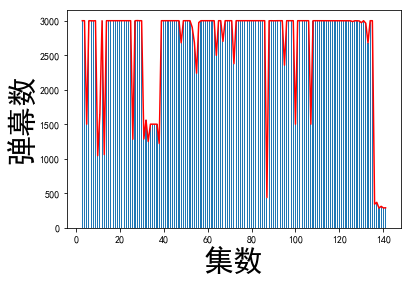

In [637]:
#x集 y弹幕量    bar+线
data1 = data['episode'].value_counts()
data1 = data1.sort_index()
data1_index = np.array(data1.index)
data1_index
data1_value = np.array(data1.values)
data1_value
plt.bar(data1_index,data1_value,0.5)
plt.xlabel('集数',size=30)
plt.ylabel('弹幕数',size=30)
plt.plot(data1_index,data1_value,c='red')

除去问题id弹幕后,最后几级数据异常,应当删除

In [638]:
#去除有问题的集数
cond_err_episode = data['episode']>135
data = data.drop(list(data[cond_err_episode].index))
data.shape

(368285, 11)

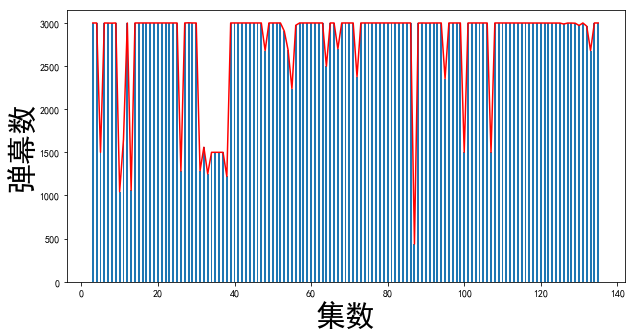

In [639]:
#x集 y弹幕量    bar+线
data1 = data['episode'].value_counts()
data1 = data1.sort_index()
data1_index = np.array(data1.index)
data1_index
data1_value = np.array(data1.values)
data1_value
plt.figure(figsize=(10,5))
plt.bar(data1_index,data1_value,0.5)
plt.xlabel('集数',size=30)
plt.ylabel('弹幕数',size=30)
plt.plot(data1_index,data1_value,c='red')

查看弹幕最少的是哪几集

In [640]:
data['episode'].value_counts().tail(10)

35     1500
34     1500
100    1500
31     1286
26     1282
33     1250
38     1220
13     1059
10     1043
87      436
Name: episode, dtype: int64

87集 436弹幕 分析:
10-13集:
31-38集:

Text(0,0.5,'弹幕数')

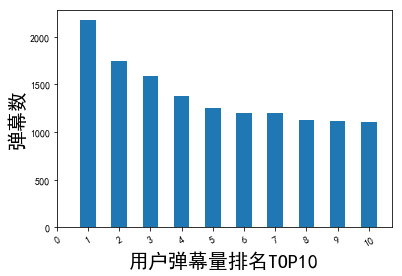

In [641]:
data_damperuser = data['userid'].value_counts()
data_damperuser_hbar = data_damperuser.values
ing=range(11)
plt.bar(top10_index,data_damperuser_hbar[:10],0.5)
plt.xticks(ing, ing, rotation=30)
plt.xlabel('用户弹幕量排名TOP10',size=20)
plt.ylabel('弹幕数',size=20)

查看用户整部动画发送多少条弹幕的分布

In [642]:
#用户弹幕数量百分比 饼图
data_user_dam = DataFrame({'count':data_damperuser.values,'userid':data_damperuser.index})
data_user_dam

,count,userid
0,2174,54ce91d1
1,1743,Da219f1c
2,1584,84cccadc
3,1377,0b7f9ddc
4,1253,8018acec
5,1203,7ca1450b
6,1196,2c2e8652
7,1126,7d969751
8,1118,1f5ff351
9,1101,ebada4bc


In [643]:
def danmu_length_pie(data_user_dam):   
    sumall = data_user_dam.shape[0]
    a1 = (data_user_dam['count']==1).sum()
    a2_5 = ((data_user_dam['count']>1)&(data_user_dam['count']<=5)).sum()
    a6_10 = ((data_user_dam['count']>5)&(data_user_dam['count']<=10)).sum()
    a11_50 = ((data_user_dam['count']>10)&(data_user_dam['count']<=50)).sum()
    a51_100 = ((data_user_dam['count']>50)&(data_user_dam['count']<=100)).sum()
    a101_500 = ((data_user_dam['count']>100)&(data_user_dam['count']<=500)).sum()
    a501 = (data_user_dam['count']>500).sum()
    li = [a1,a2_5,a6_10,a11_50,a51_100,a101_500,a501]
    xp=[]
    for i in li:
        i = float(i)
        t = (i/sumall)
        xp.append(t)
    plt.figure(figsize=(6,9))
    labels = [u'1个', u'2-5个', u'6-10个', u'11-50个',u'51-100个',u'101-500个',u'500个以上' ]
    sizes = xp
    plt.axis('equal')
    plt.title(u'全集用户弹幕数量分布图',loc='left')
    plt.pie(sizes,  labels=labels,labeldistance=1.1,autopct = '%2.2f%%', startangle = 90, pctdistance = 0.5,explode=[0,0,0,0,0.5,1,1.5],shadow=True)
    plt.show()
    plt.close()


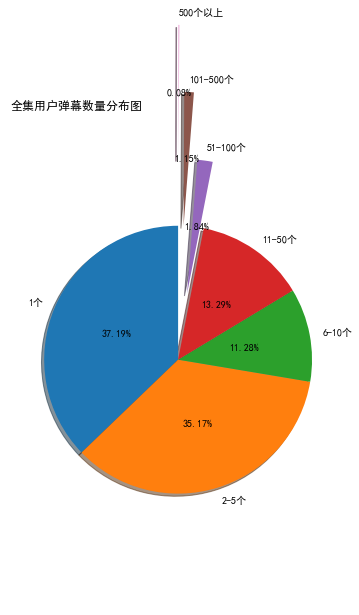

In [644]:
danmu_length_pie(data_user_dam)

In [645]:
data.head()

,message,dtTime,rgb,danmu_model,font,userid,stamp,episode,hour,year,mon
0,剧透：奇犽出现，少女化,0,16776960,1,36,3859422e,1329040272,3,17,2012,2
1,另一个补番的乃在吗。。。,0,16777215,1,25,5e733973,1364217939,3,21,2013,3
2,不想看吵架的请屏蔽 难听、烂、剧透、垃圾、优越,0,16711680,5,25,366cf67f,1380892361,3,21,2013,10
3,h,0,16777215,1,25,94d849aa,1386144291,3,16,2013,12
4,我是3001,0,16777215,1,25,235a82a0,1393138554,3,14,2014,2


In [646]:
#每集弹幕分布 x时间 y弹幕量
data.shape

(368285, 11)

查看平均每集的弹幕密度分布

In [647]:
cond4 = (data.episode==33)
max3 = data[cond4]['dtTime'].max()
min3 = data[cond4]['dtTime'].min()
display(max3,min3)

'997.654'

'0'

In [648]:
def dtTimemin(dttime):
    return float(dttime)//60
data['dtTimemin']=data['dtTime'].map(dtTimemin)

In [649]:
data['dtTimemin'].value_counts()

0.0        31010
21.0       19422
20.0       16026
1.0        16000
17.0       15840
19.0       15583
3.0        15353
16.0       15275
10.0       15271
7.0        15049
11.0       14960
6.0        14897
12.0       14818
2.0        14742
4.0        14714
5.0        14404
18.0       14376
13.0       14217
15.0       14202
14.0       14137
9.0        13832
8.0        13669
22.0       13379
23.0        7107
41446.0        1
41.0           1
Name: dtTimemin, dtype: int64

一般每集时间为20分钟左右, 41446分钟为异常值,查看后删除

In [650]:
conds = data['dtTimemin']==41446.0
dropindex = data[conds].index[0]
data = data.drop(dropindex)

查看41分钟的弹幕,判断为视频进度条的问题,可以作为bug问题等反馈给相关部门,改善用户体验

In [651]:
conds2 = data['dtTimemin']==41.0
data[conds2]

,message,dtTime,rgb,danmu_model,font,userid,stamp,episode,hour,year,mon,dtTimemin
356641,发条40min的弾幕~~,2490.2,16777215,1,25,9f2cfcce,1402032625,131,13,2014,6,41.0


In [652]:
data = data.drop(data[conds2].index[0])

In [653]:
data_meanday = data['dtTimemin'].value_counts().sort_index()

In [654]:
data_meanday

0.0     31010
1.0     16000
2.0     14742
3.0     15353
4.0     14714
5.0     14404
6.0     14897
7.0     15049
8.0     13669
9.0     13832
10.0    15271
11.0    14960
12.0    14818
13.0    14217
14.0    14137
15.0    14202
16.0    15275
17.0    15840
18.0    14376
19.0    15583
20.0    16026
21.0    19422
22.0    13379
23.0     7107
Name: dtTimemin, dtype: int64

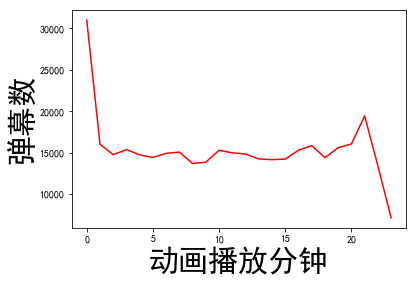

In [655]:
plt.xlabel('动画播放分钟',size=30)
plt.ylabel('弹幕数',size=30)
plt.plot(np.array(data_meanday.index),np.array(data_meanday.values),c='red')

上图说明 大家喜欢再开始播放和oped的时候发送弹幕 20分钟以后的下降 是因为41分钟的进度条bug

下面看看发送弹幕的观众,喜欢在几点钟观看视频

In [656]:
# x小时  y弹幕数量
data_24 = data['hour'].value_counts().sort_index()
data_24

0     17916
1     10857
2      7050
3      4259
4      3392
5      2917
6      2771
7      3361
8      4701
9      7739
10    11624
11    13779
12    20734
13    21501
14    17342
15    16653
16    18015
17    19749
18    24389
19    27464
20    28863
21    29079
22    29422
23    24706
Name: hour, dtype: int64

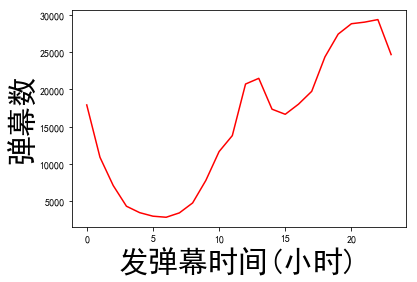

In [657]:
plt.xlabel('发弹幕时间(小时)',size=30)
plt.ylabel('弹幕数',size=30)
plt.plot(np.array(data_24.index),np.array(data_24.values),c='red')

可以看出 大部分人睡眠时间在5-6点周围 大概1-9点的范围. 当中的突起,代表了午间休息和午饭时间, 17点以后逐渐增加进入高峰,代表下班/放学以后

下面制作一个词云,分析大家的弹幕中最关注的词

In [658]:
testword = ' '.join(data.message.values)

In [659]:
import jieba  # 分词包
from wordcloud import WordCloud, ImageColorGenerator    # 词云包
from scipy.misc import imread
segtests = jieba.cut(testword)

In [660]:
segment = []
for seg in segtests:
    if len(seg) > 1 and seg != '\r\n':
        segment.append(seg)

In [661]:
# 去停用词(文本去噪)
words_df = pd.DataFrame({'segment': segment})
# 字典中的keys就是DataFrame里面的columns，但是没有index的值，所以需要自己设定，不设定默认是从零开始计数。
words_df.head()

,segment
0,剧透
1,出现
2,少女
3,一个
4,补番


In [662]:
words_df.shape

(976816, 1)

In [663]:
#去停用词
stopwords = pd.read_csv("../data/stopwords.txt", index_col=False,quoting=3, sep='\t', names=['stopword'], encoding="utf8")
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]

In [664]:
# 词汇频率表
words_stat = words_df.groupby(by=['segment'])['segment'].agg({"count": np.size})
words_stat = words_stat.reset_index().sort_values(by="count", ascending=False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [665]:
words_stat.head(10)

,segment,count
3085,OP,9834
22533,哈哈哈,7940
22915,啊啊啊,7362
60888,蚂蚁,6983
1745,BGM,6757
19406,卧槽,5397
23923,圣光,4604
6211,op,4601
61786,西索,4348
40364,旧版,3928


In [666]:
content = ' '.join(words_stat.head(40).segment.values)

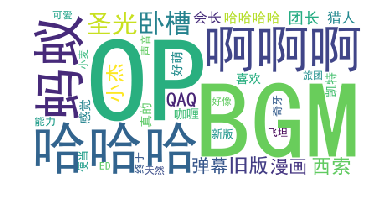

In [667]:
## 自定义词云背景
#bimg = imread('heart.jpeg')
# #bimgColors = ImageColorGenerator(bimg)
wordcloud = WordCloud(font_path='simhei.ttf', background_color="white",max_words=40).generate(content)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()